# Section V. CV Research

### Load libraries, functions, palette, theme

In [1]:
import os
from pathlib import Path

In [2]:
# load functions
from __functions import *

In [3]:
# load libraries and palette
%run __libraries.ipynb

In [4]:
# start stopwatch
start = stopwatch_start()

### Variables

In [5]:
dir_current = '05-cv-research'

In [6]:
dir_save_files = 'files/'

In [7]:
dir_load_files = 'files/'

In [8]:
dir_save_img = 'docs/img/'

### Load Files

##### Dictionaries

In [9]:
datasets = loadit('datasets', dir=dir_load_files)

In [10]:
variables = loadit('variables', dir=dir_load_files)

In [11]:
cv = loadit('cv', dir=dir_load_files)

##### Datasets

In [12]:
train = extract_variable('train_preprocessed', datasets)

In [13]:
valid = extract_variable('valid_preprocessed', datasets)

In [14]:
test = extract_variable('test_preprocessed', datasets)

Variable test_preprocessed not found


##### CV results

In [15]:
cv0 = extract_variable('cv0', cv)

In [16]:
cv1 = extract_variable('cv1', cv)

In [17]:
cv2 = extract_variable('cv2', cv)

In [18]:
cv3 = extract_variable('cv3', cv)

In [19]:
cv4 = extract_variable('cv4', cv)

### Features

In [20]:
target = extract_variable('target', variables)

In [21]:
features = extract_variable('features', variables)

In [22]:
order = extract_variable('order', variables)

In [23]:
fourier_period = extract_variable('fourier_period', variables)

In [24]:
fourier_order = extract_variable('fourier_order', variables)

In [25]:
cv_indexes_train = extract_variable('cv_indexes_train', variables)

In [26]:
cv_indexes_eval = extract_variable('cv_indexes_eval', variables)

## Cross-validation 3: Base Model

- Model: ARIMA (2, 1, 1)(144)(4)
- Train: February - June
- Eval: March - July

In [27]:
%%time
if cv4 is not None:
    cv4_results_df_raw = cv4.copy() 
else:
    cv4_results_df_raw = cv_arima_evaluation(
        data=train,
        target=target,
        features=features,
        cv_indexes_train=cv_indexes_train,
        cv_indexes_eval=cv_indexes_eval,
        model_order=order,
        fourier_preiod=fourier_period,
        fourier_order=fourier_order)

CPU times: user 236 µs, sys: 4 µs, total: 240 µs
Wall time: 255 µs


In [28]:
cv4_results_df = cv4_results_df_raw.copy()

In [29]:
cv4_results_df['resid_diff'] = cv4_results_df['resid'].diff(1)

In [30]:
cv4_results_df['resid_return'] = cv4_results_df['resid'].pct_change(1).mul(100)

In [31]:
cv4_results_df['resid_rolling_1h'] =  cv4_results_df['resid'].rolling(6).median()

In [32]:
cv4_results_df['resid_rolling_6h'] =  cv4_results_df['resid'].rolling(72).median()

## CV Results Visualization

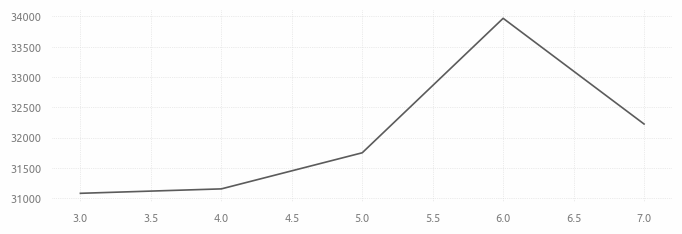

In [33]:
plt.plot(cv4_results_df.groupby(cv4_results_df.index.month)['pred'].mean());

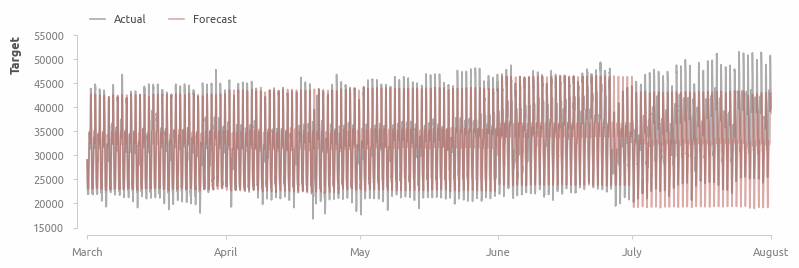

Images 'cv_results_base.png' and 'cv_results_base.svg' successfully saved into 'docs/img/' directory


In [34]:
fig = plt.figure(figsize=(9, 2.5))

plt.plot(
    cv4_results_df.loc['2017-03-01':, 'true'],
    color=palette[0], alpha=0.5, label='Actual')
plt.plot(
    cv4_results_df.loc[:, 'pred'],
    color=palette[1], alpha=0.5, label='Forecast')
axis_rstyle(offset_left=2.5, offset_bottom=5)
axis_formatter_locator('%B')

plt.legend(**legend_inline(), handlelength=1.35)
plt.ylabel('Target')
plt.show()

savefig('cv_results_base', dir_save_img, figure=fig)

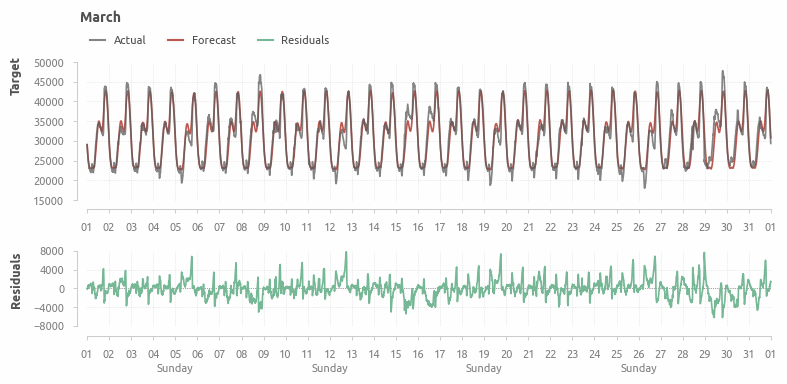

Images 'cv_detail_plot_march.png' and 'cv_detail_plot_march.svg' successfully saved into 'docs/img/' directory


In [35]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3.5), height_ratios=[2, 1])
cv_results_plot_month = '2017-03'

ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'true'],
    color=palette[0], alpha=0.75, label='Actual')

ax[0].legend(
    **legend_inline(),
    **legend_create_handles(
        3, kind='l',
        labels=['Actual', 'Forecast', 'Residuals'],
        colors=[palette[0], palette[1], palette[3]],
        alphas=[0.75, 1, 0.75]))

axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[0])

ax[1].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'resid'],
    color=alpha_color(palette[3], 0.75))
ax[1].axhline(0, 0.01, 0.99, lw=0.5, ls=':', zorder=-1)
axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[1])
ax12 = axis_secondary(pad=27)
axis_formatter_locator(
    '%A',locator=mpl.dates.WeekdayLocator(mpl.dates.SU), ax=ax12)

axis_rstyle(
    offset_bottom=2.5, offset_left=2.5,
    xslice=[1, -1], ax=ax[0], grid=True)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5, xslice=[1, -1],
    yticks=[-8000, 8000, 4000], ylim=[-8000, 8000], ax=ax[1], grid=True)

plt.subplots_adjust(hspace=0.4)
ax[0].set_title('March', **title_inline)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Residuals')
plt.show()

savefig('cv_detail_plot_march', dir_save_img, figure=fig)

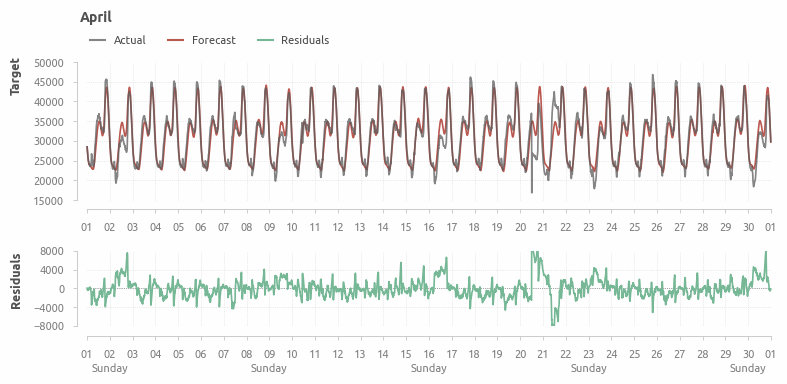

Images 'cv_detail_plot_april.png' and 'cv_detail_plot_april.svg' successfully saved into 'docs/img/' directory


In [36]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3.5), height_ratios=[2, 1])
cv_results_plot_month = '2017-04'

ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'true'],
    color=palette[0], alpha=0.75, label='Actual')

ax[0].legend(
    **legend_inline(),
    **legend_create_handles(
        3, kind='l',
        labels=['Actual', 'Forecast', 'Residuals'],
        colors=[palette[0], palette[1], palette[3]],
        alphas=[0.75, 1, 0.75]))

axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[0])

ax[1].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'resid'],
    color=alpha_color(palette[3], 0.75))
ax[1].axhline(0, 0.01, 0.99, lw=0.5, ls=':', zorder=-1)
axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[1])
ax12 = axis_secondary(pad=27)
axis_formatter_locator(
    '%A',locator=mpl.dates.WeekdayLocator(mpl.dates.SU), ax=ax12)

axis_rstyle(
    offset_bottom=2.5, offset_left=2.5,
    xslice=[1, -1], ax=ax[0], grid=True)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5, xslice=[1, -1],
    yticks=[-8000, 8000, 4000], ylim=[-8000, 8000], ax=ax[1], grid=True)

plt.subplots_adjust(hspace=0.4)
ax[0].set_title('April', **title_inline)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Residuals')
plt.show()

savefig('cv_detail_plot_april', dir_save_img, figure=fig)

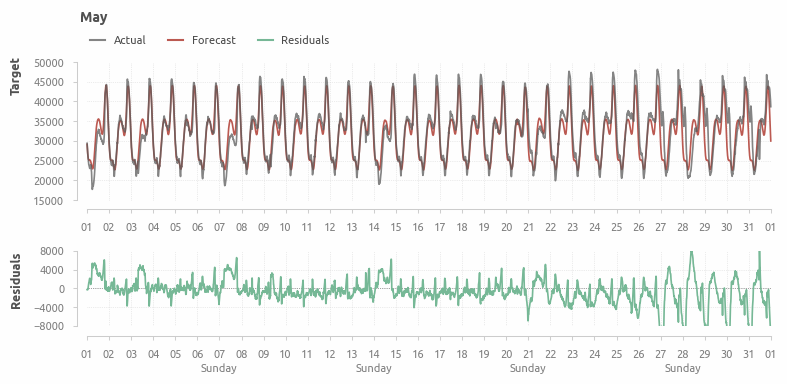

Images 'cv_detail_plot_may.png' and 'cv_detail_plot_may.svg' successfully saved into 'docs/img/' directory


In [37]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3.5), height_ratios=[2, 1])
cv_results_plot_month = '2017-05'

ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'true'],
    color=palette[0], alpha=0.75, label='Actual')

ax[0].legend(
    **legend_inline(),
    **legend_create_handles(
        3, kind='l',
        labels=['Actual', 'Forecast', 'Residuals'],
        colors=[palette[0], palette[1], palette[3]],
        alphas=[0.75, 1, 0.75]))

axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[0])

ax[1].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'resid'],
    color=alpha_color(palette[3], 0.75))
ax[1].axhline(0, 0.01, 0.99, lw=0.5, ls=':', zorder=-1)
axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[1])
ax12 = axis_secondary(pad=27)
axis_formatter_locator(
    '%A',locator=mpl.dates.WeekdayLocator(mpl.dates.SU), ax=ax12)

axis_rstyle(
    offset_bottom=2.5, offset_left=2.5,
    xslice=[1, -1], ax=ax[0], grid=True)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5, xslice=[1, -1],
    yticks=[-8000, 8000, 4000], ylim=[-8000, 8000], ax=ax[1], grid=True)

plt.subplots_adjust(hspace=0.4)
ax[0].set_title('May', **title_inline)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Residuals')
plt.show()

savefig('cv_detail_plot_may', dir_save_img, figure=fig)

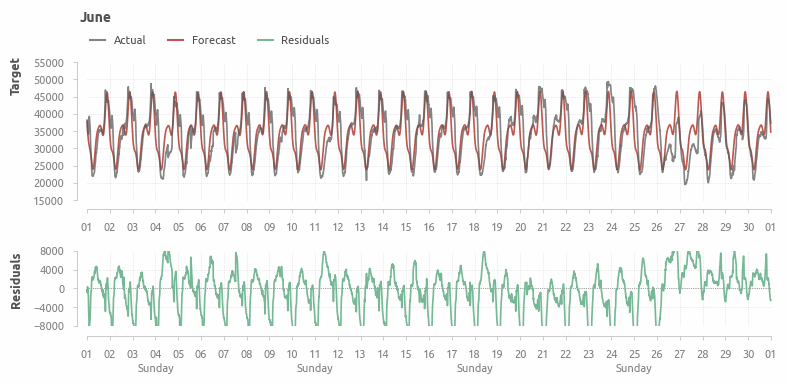

Images 'cv_detail_plot_june.png' and 'cv_detail_plot_june.svg' successfully saved into 'docs/img/' directory


In [38]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3.5), height_ratios=[2, 1])
cv_results_plot_month = '2017-06'

ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'true'],
    color=palette[0], alpha=0.75, label='Actual')

ax[0].legend(
    **legend_inline(),
    **legend_create_handles(
        3, kind='l',
        labels=['Actual', 'Forecast', 'Residuals'],
        colors=[palette[0], palette[1], palette[3]],
        alphas=[0.75, 1, 0.75]))

axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[0])

ax[1].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'resid'],
    color=alpha_color(palette[3], 0.75))
ax[1].axhline(0, 0.01, 0.99, lw=0.5, ls=':', zorder=-1)
axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[1])
ax12 = axis_secondary(pad=27)
axis_formatter_locator(
    '%A',locator=mpl.dates.WeekdayLocator(mpl.dates.SU), ax=ax12)

axis_rstyle(
    offset_bottom=2.5, offset_left=2.5,
    xslice=[1, -1], ax=ax[0], grid=True)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5, xslice=[1, -1],
    yticks=[-8000, 8000, 4000], ylim=[-8000, 8000], ax=ax[1], grid=True)

plt.subplots_adjust(hspace=0.4)
ax[0].set_title('June', **title_inline)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Residuals')
plt.show()

savefig('cv_detail_plot_june', dir_save_img, figure=fig)

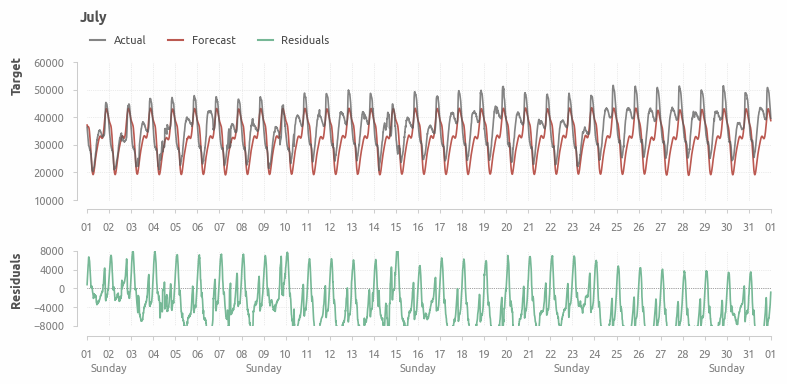

Images 'cv_detail_plot_july.png' and 'cv_detail_plot_july.svg' successfully saved into 'docs/img/' directory


In [39]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3.5), height_ratios=[2, 1])
cv_results_plot_month = '2017-07'

ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'pred'],
    color=palette[1], label='Forecast')
ax[0].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'true'],
    color=palette[0], alpha=0.75, label='Actual')

ax[0].legend(
    **legend_inline(),
    **legend_create_handles(
        3, kind='l',
        labels=['Actual', 'Forecast', 'Residuals'],
        colors=[palette[0], palette[1], palette[3]],
        alphas=[0.75, 1, 0.75]))

axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[0])

ax[1].plot(
    cv4_results_df.loc[cv_results_plot_month:cv_results_plot_month, 'resid'],
    color=alpha_color(palette[3], 0.75))
ax[1].axhline(0, 0.01, 0.99, lw=0.5, ls=':', zorder=-1)
axis_formatter_locator('%d', mpl.dates.DayLocator(), ax=ax[1])
ax12 = axis_secondary(pad=27)
axis_formatter_locator(
    '%A',locator=mpl.dates.WeekdayLocator(mpl.dates.SU), ax=ax12)

axis_rstyle(
    offset_bottom=2.5, offset_left=2.5,
    xslice=[1, -1], ax=ax[0], grid=True)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5, xslice=[1, -1],
    yticks=[-8000, 8000, 4000], ylim=[-8000, 8000], ax=ax[1], grid=True)

plt.subplots_adjust(hspace=0.4)
ax[0].set_title('July', **title_inline)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Residuals')
plt.show()

savefig('cv_detail_plot_july', dir_save_img, figure=fig)

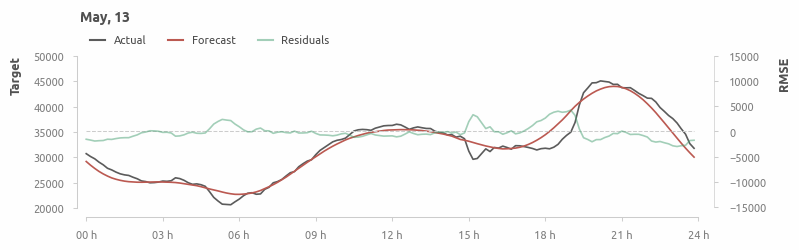

Images 'cv_actual_forecast_day_may.png' and 'cv_actual_forecast_day_may.svg' successfully saved into 'docs/img/' directory


In [40]:
fig = plt.figure(figsize=(8, 2))
ax = ax_current()

ax.set_ylabel('Target')
ax.plot(
    cv4_results_df.loc['2017-05-13', 'true'],
    color=palette[0], label='Actual')
ax.plot(
    cv4_results_df.loc['2017-05-13', 'pred'],
    color=palette[1], label='Forecast')
axis_rstyle(offset_bottom=5, offset_left=2.5, yticks=[20000, 50000, 5000])
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H h'))
ticklabels_f_modify(-1, '24 h')

ax2 = add_twinx(ylim=[-15000, 15000], yticks=[-15000, 15001, 5000])
ax2.set_ylabel('RMSE')
ax2.set_ylim(-15500, 15000)
ax2.spines['right'].set_bounds(-15000, 15000)
plot_hline()
ax2.plot(
    cv4_results_df.loc['2017-05-13', 'resid'],
    color=palette[3], alpha=0.5, label='Residuals')

plt.legend(
    **legend_inline(3),
    **legend_create_handles(
        3, kind='l',
        colors=[palette[0], palette[1], palette[3]],
        alphas=[1, 1, 0.5],
        labels=['Actual', 'Forecast', 'Residuals']))

plt.title('May, 13', **title_inline)
plt.show()

savefig('cv_actual_forecast_day_may', dir_save_img, figure=fig)

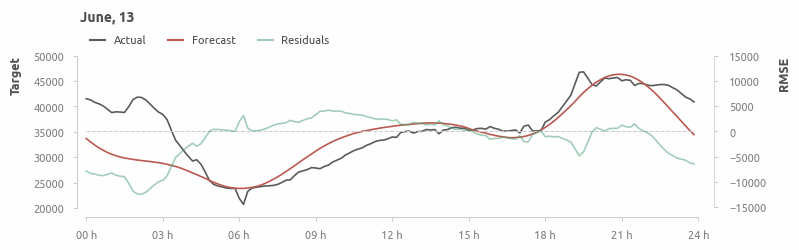

Images 'cv_actual_forecast_day_june.png' and 'cv_actual_forecast_day_june.svg' successfully saved into 'docs/img/' directory


In [41]:
fig = plt.figure(figsize=(8, 2))
ax = ax_current()

ax.set_ylabel('Target')
ax.plot(
    cv4_results_df.loc['2017-06-13', 'true'],
    color=palette[0], label='Actual')
ax.plot(
    cv4_results_df.loc['2017-06-13', 'pred'],
    color=palette[1], label='Forecast')
axis_rstyle(offset_bottom=5, offset_left=2.5, yticks=[20000, 50000, 5000])
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H h'))
ticklabels_f_modify(-1, '24 h')

ax2 = add_twinx(ylim=[-15000, 15000], yticks=[-15000, 15001, 5000])
ax2.set_ylabel('RMSE')
ax2.set_ylim(-15500, 15000)
ax2.spines['right'].set_bounds(-15000, 15000)
plot_hline()
ax2.plot(
    cv4_results_df.loc['2017-06-13', 'resid'],
    color=palette[3], alpha=0.5, label='Residuals')

plt.legend(
    **legend_inline(3),
    **legend_create_handles(
        3, kind='l',
        colors=[palette[0], palette[1], palette[3]],
        alphas=[1, 1, 0.5],
        labels=['Actual', 'Forecast', 'Residuals']))

plt.title('June, 13', **title_inline)
plt.show()

savefig('cv_actual_forecast_day_june', dir_save_img, figure=fig)

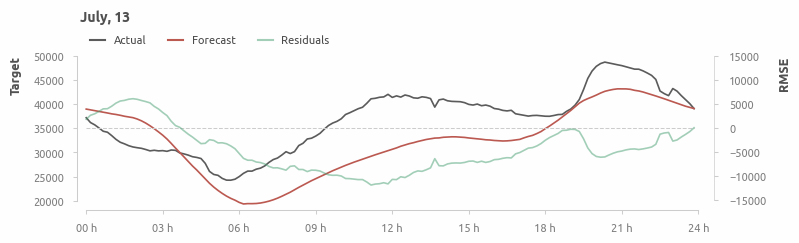

Images 'cv_actual_forecast_day_july.png' and 'cv_actual_forecast_day_july.svg' successfully saved into 'docs/img/' directory


In [42]:
fig = plt.figure(figsize=(8, 2))
ax = ax_current()

ax.set_ylabel('Target')
ax.plot(
    cv4_results_df.loc['2017-07-13', 'true'],
    color=palette[0], label='Actual')
ax.plot(
    cv4_results_df.loc['2017-07-13', 'pred'],
    color=palette[1], label='Forecast')
axis_rstyle(offset_bottom=0, offset_left=2.5, yticks=[20000, 50000, 5000])
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H h'))
ticklabels_f_modify(-1, '24 h')

ax2 = add_twinx(ylim=[-15000, 15000], yticks=[-15000, 15001, 5000])
ax2.set_ylabel('RMSE')
ax2.set_ylim(-17000, 15000)
ax2.spines['right'].set_bounds(-15000, 15000)
plot_hline()
ax2.plot(
    cv4_results_df.loc['2017-07-13', 'resid'],
    color=palette[3], alpha=0.5, label='Residuals')

plt.legend(
    **legend_inline(3),
    **legend_create_handles(
        3, kind='l',
        colors=[palette[0], palette[1], palette[3]],
        alphas=[1, 1, 0.5],
        labels=['Actual', 'Forecast', 'Residuals']))

plt.title('July, 13', **title_inline)
plt.show()

savefig('cv_actual_forecast_day_july', dir_save_img, figure=fig)

## Residuals Prediction

## Save Data

In [43]:
cv['cv4'] = cv4_results_df_raw

In [44]:
saveit(cv, 'cv', dir_save_files)

File 'cv.pkl' saved in directory 'files/'


### Execution time

In [45]:
stopwatch_stop(start)

Execution time: 0:00:23
